# Social Media Addiction Among Students: A Cross-Country Analysis

# Introduction¶

## In an era where digital connectivity defines social interaction, students worldwide have become increasingly immersed in social media platforms. This notebook explores the relationship between students' social media usage patterns and their academic performance, mental health, and relationships. By analyzing survey data from students across different countries, we aim to uncover insights about the impacts of social media addiction on various aspects of student life.


In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Students Social Media Addiction.csv')

In [3]:
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [4]:
df.sample()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
469,470,21,Male,Graduate,Canada,3.9,Instagram,Yes,8.3,6,Single,3,7


In [5]:
df.tail()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4
704,705,19,Female,Undergraduate,Poland,6.2,Facebook,Yes,6.3,5,Single,4,8


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [7]:
df.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


# Data Pre-processing and Feature Engineering

In [8]:
# Convert categorical variables to appropriate data types if needed
# Check unique values in categorical columns

categorical_cols=df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\nunique values in {col}:")
    print(df[col].value_counts())


unique values in Gender:
Gender
Female    353
Male      352
Name: count, dtype: int64

unique values in Academic_Level:
Academic_Level
Undergraduate    353
Graduate         325
High School       27
Name: count, dtype: int64

unique values in Country:
Country
India          53
USA            40
Canada         34
France         27
Mexico         27
               ..
Oman            1
Afghanistan     1
Syria           1
Yemen           1
Bhutan          1
Name: count, Length: 110, dtype: int64

unique values in Most_Used_Platform:
Most_Used_Platform
Instagram    249
TikTok       154
Facebook     123
WhatsApp      54
Twitter       30
LinkedIn      21
WeChat        15
Snapchat      13
VKontakte     12
LINE          12
KakaoTalk     12
YouTube       10
Name: count, dtype: int64

unique values in Affects_Academic_Performance:
Affects_Academic_Performance
Yes    453
No     252
Name: count, dtype: int64

unique values in Relationship_Status:
Relationship_Status
Single             384
In Relati

In [9]:
df['Age'].max()

np.int64(24)

# Create additional features for analysis

In [10]:
# Create age groups

bins=[15,20,25,30,35]

labels =['16-20','21-25','26-30','31-35']

df['Age_Group']=pd.cut(df['Age'],bins=bins,labels=labels,right=False)

In [11]:
# Categorize social media usage hours

usage_bins=[0,2,4,6,12,24]

usage_labels=['Minimal (0-2h)', 'Moderate (2-4h)', 'High (4-6h)', 'Very High (6-12h)', 'Extreme (12h+)']

df['Usage_Category']=pd.cut(df['Avg_Daily_Usage_Hours'],bins=usage_bins,labels=usage_labels,)

In [12]:
# Categorize sleep hours

sleep_bins=[0,5,7,9,12]

sleep_labels = ['Poor (<5h)', 'Fair (5-7h)', 'Good (7-9h)', 'Excellent (9h+)']

df['Sleep_Category'] = pd.cut(df['Sleep_Hours_Per_Night'], bins=sleep_bins, labels=sleep_labels)

# Exploratory Data Analysis (EDA)

## 1. Student Demographics

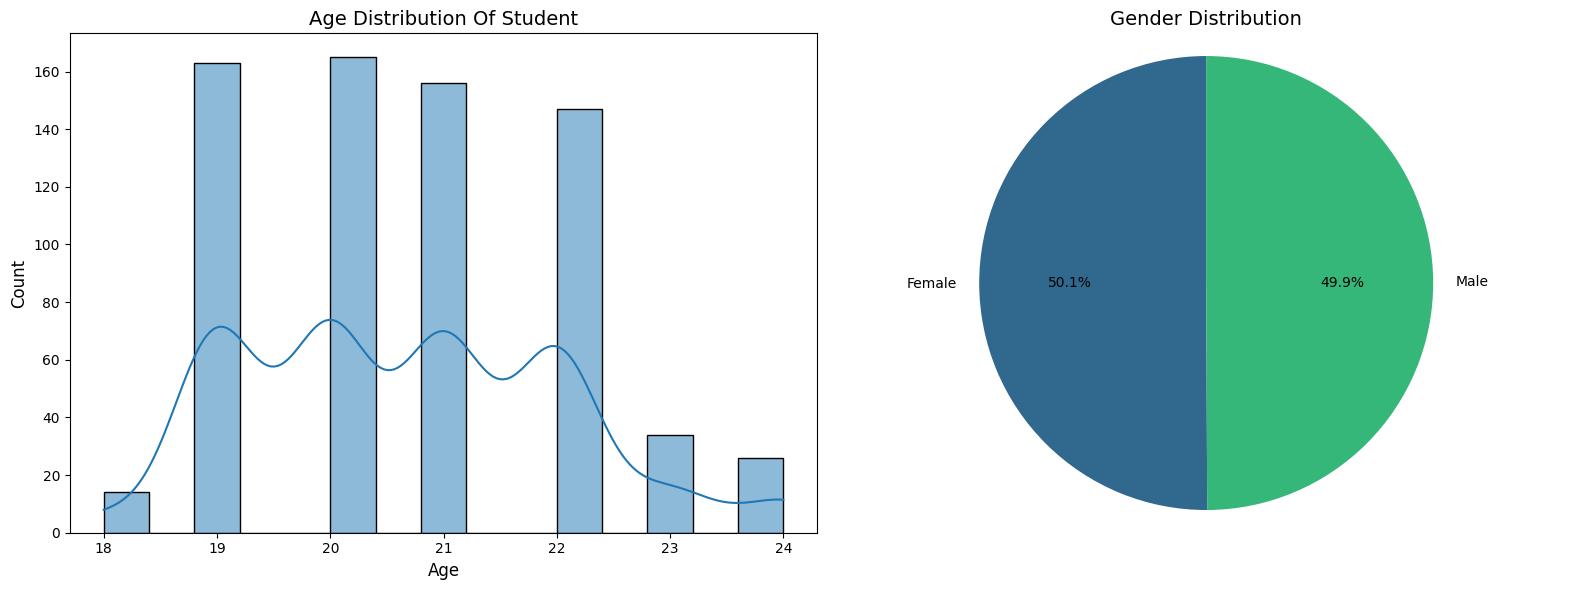

In [13]:
# #### Age and Gender Distribution
plt.figure(figsize=(16,6))

# Age Distribution
plt.subplot(1,2,1)
sns.histplot(df['Age'],kde=True,bins=15)
plt.title('Age Distribution Of Student', fontsize=14)
plt.xlabel('Age',fontsize=12)
plt.ylabel('Count',fontsize=12)

# Gender Distribution

plt.subplot(1,2,2)
gender_count=df['Gender'].value_counts()
labels=gender_count.index
plt.pie(gender_count,labels=labels,autopct="%1.1f%%",startangle=90,colors=sns.color_palette('viridis',len(gender_count)))
plt.title('Gender Distribution',fontsize=14)
plt.axis('equal')

plt.tight_layout()
plt.show()

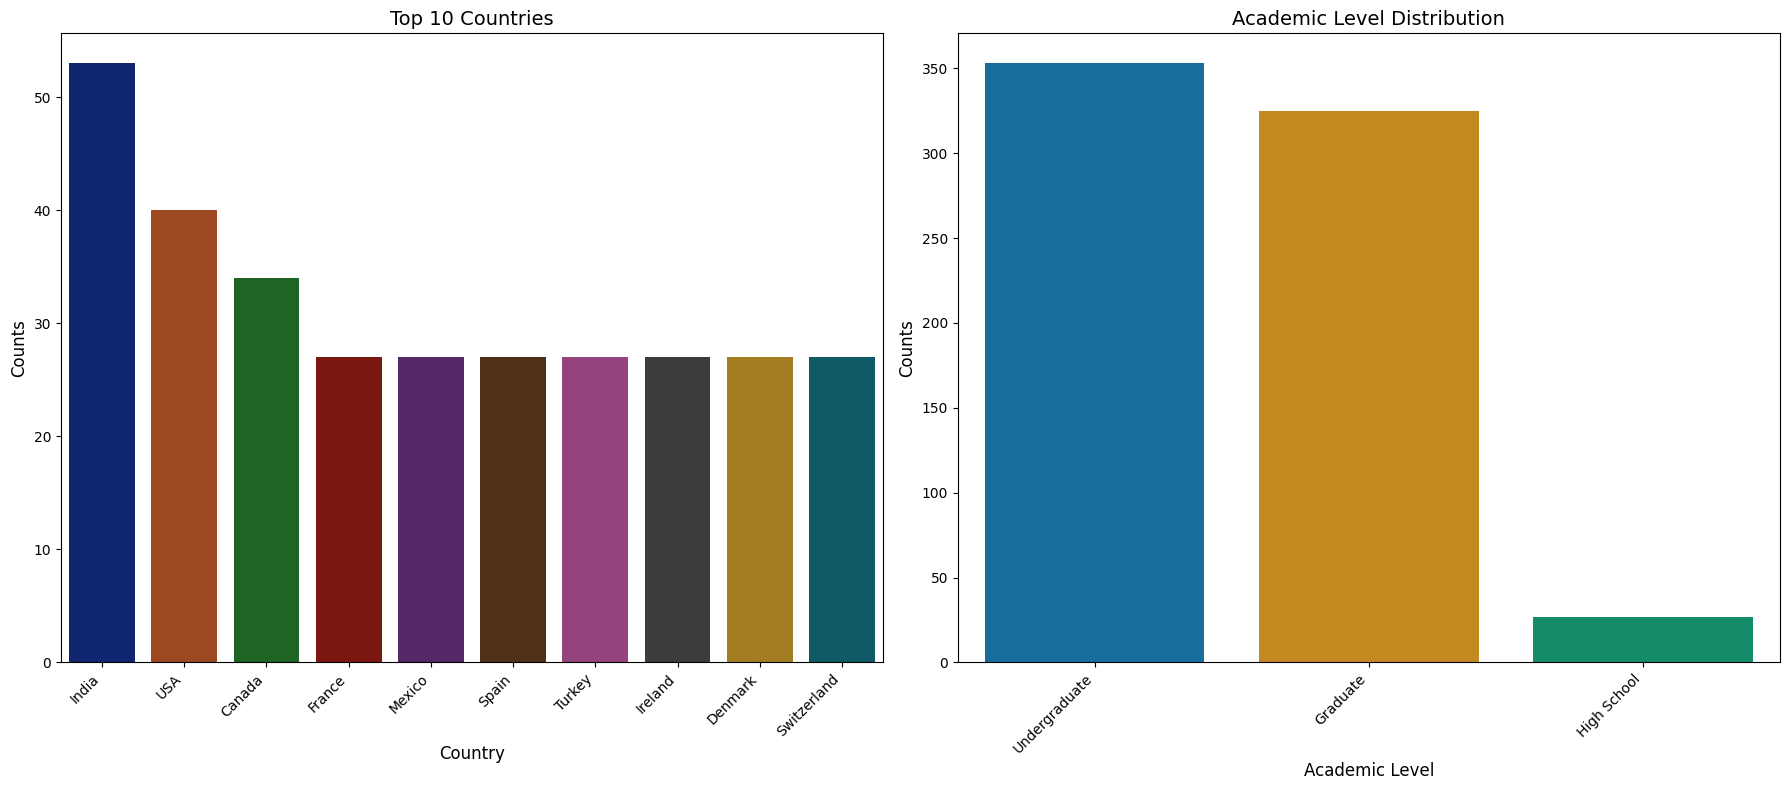

In [14]:
# #### Country and Academic Level Distribution
plt.figure(figsize=(18,8))

# Country distribution
plt.subplot(1,2,1)
country_counts=df['Country'].value_counts().head(10) #head(10) for top 10 countries
sns.barplot(x=country_counts.index,y=country_counts.values,palette='dark')
plt.title('Top 10 Countries',fontsize=14)
plt.xlabel('Country',fontsize=12)
plt.ylabel('Counts',fontsize=12)
plt.xticks(rotation=45,ha='right')

# Academic level distribution

plt.subplot(1,2,2)
acadmic_counts=df['Academic_Level'].value_counts()
sns.barplot(x=acadmic_counts.index,y=acadmic_counts.values,palette='colorblind')
plt.title('Academic Level Distribution',fontsize=14)
plt.xlabel('Academic Level',fontsize=12)
plt.ylabel('Counts',fontsize=12)
plt.xticks(rotation=45,ha='right')


plt.tight_layout()
plt.show()

# 2. Social Media Usage Patterns

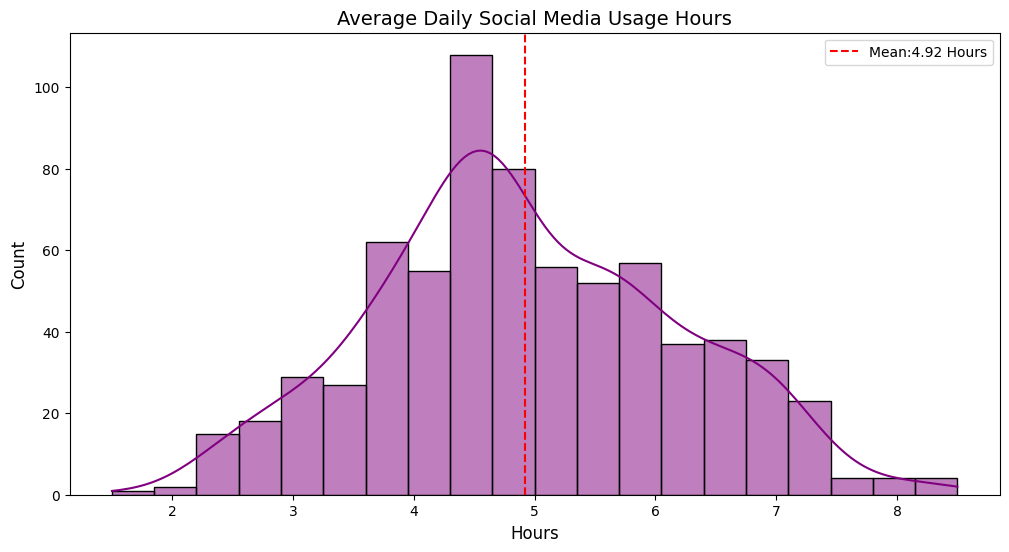

In [15]:
plt.figure(figsize=(12,6))
sns.histplot(df['Avg_Daily_Usage_Hours'],kde=True,bins=20,color='purple')
plt.title('Average Daily Social Media Usage Hours',fontsize=14)
plt.xlabel('Hours', fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.axvline(df['Avg_Daily_Usage_Hours'].mean(),color='red',linestyle='--',label=f"Mean:{df['Avg_Daily_Usage_Hours'].mean():.2f} Hours")
plt.legend()
plt.show()

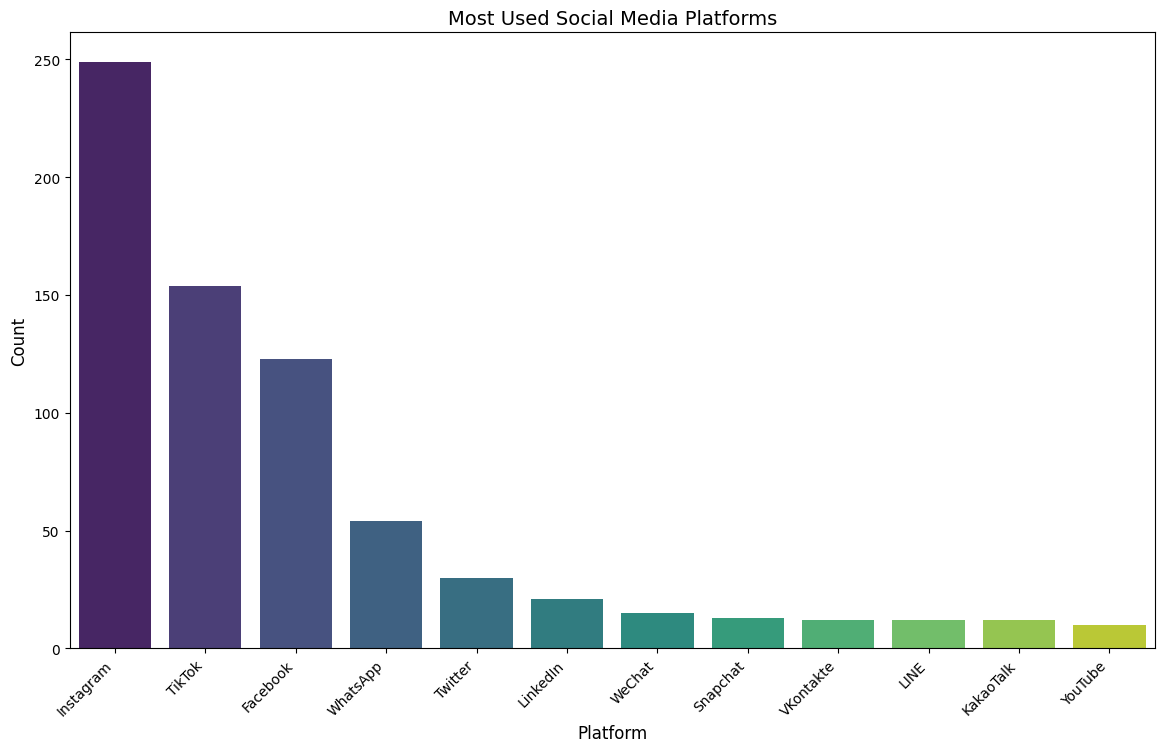

In [16]:
# #### Most Used Platforms

plt.figure(figsize=(14,8))

platform_count=df['Most_Used_Platform'].value_counts()

sns.barplot(x=platform_count.index,y=platform_count.values,palette='viridis')
plt.title('Most Used Social Media Platforms',fontsize=14)
plt.xlabel('Platform',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xticks(rotation=45,ha='right')
plt.show()

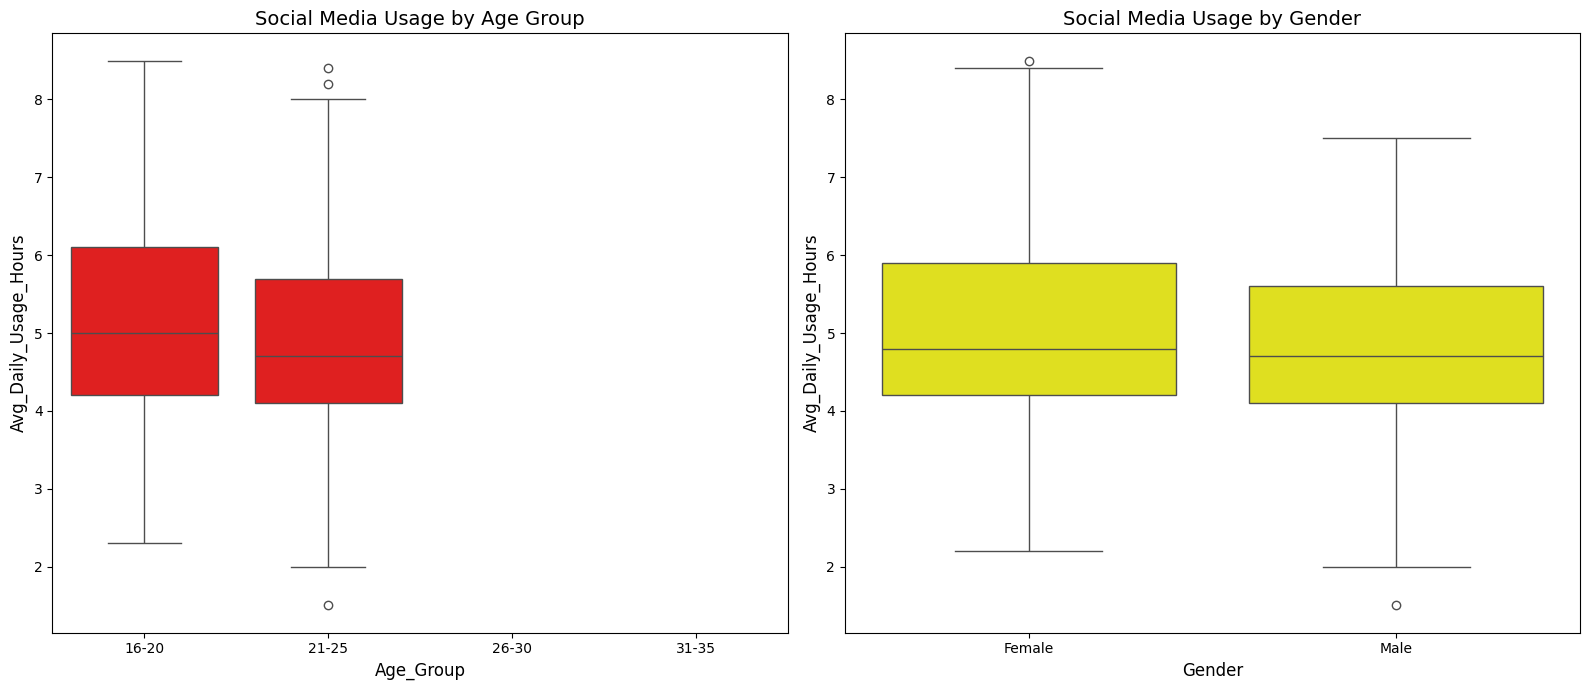

In [17]:
# #### Social Media Usage by Age Group and Gender
plt.figure(figsize=(16,7))

# Usage by age group
plt.subplot(1,2,1)

sns.boxplot(x='Age_Group',y='Avg_Daily_Usage_Hours',data=df,color='red')
plt.title('Social Media Usage by Age Group',fontsize=14)
plt.xlabel('Age_Group',fontsize=12)
plt.ylabel('Avg_Daily_Usage_Hours',fontsize=12)

# Usage By Gender
plt.subplot(1,2,2)
sns.boxplot(x='Gender',y='Avg_Daily_Usage_Hours',data=df,color='yellow')
plt.title('Social Media Usage by Gender',fontsize=14)
plt.xlabel('Gender',fontsize=12)
plt.ylabel('Avg_Daily_Usage_Hours',fontsize=12)

plt.tight_layout()
plt.show()

# 3. Academic Impact Analysis

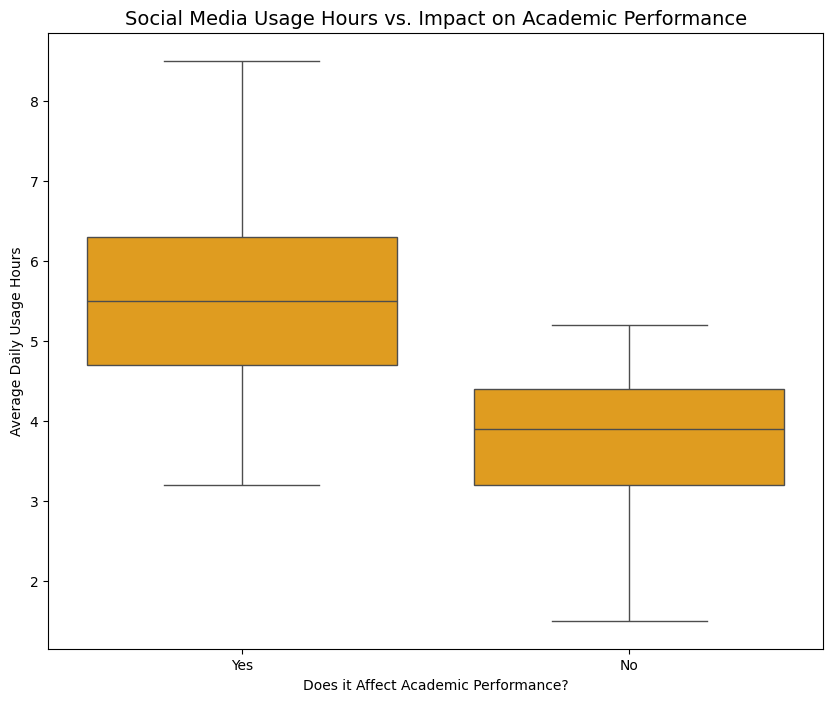

In [18]:
# #### Academic Performance vs Social Media Usage

plt.figure(figsize=(10,8))
sns.boxplot(data=df,x='Affects_Academic_Performance',y='Avg_Daily_Usage_Hours',color='orange')
plt.title('Social Media Usage Hours vs. Impact on Academic Performance',fontsize=14)
plt.xlabel('Does it Affect Academic Performance?')
plt.ylabel('Average Daily Usage Hours')
plt.show()

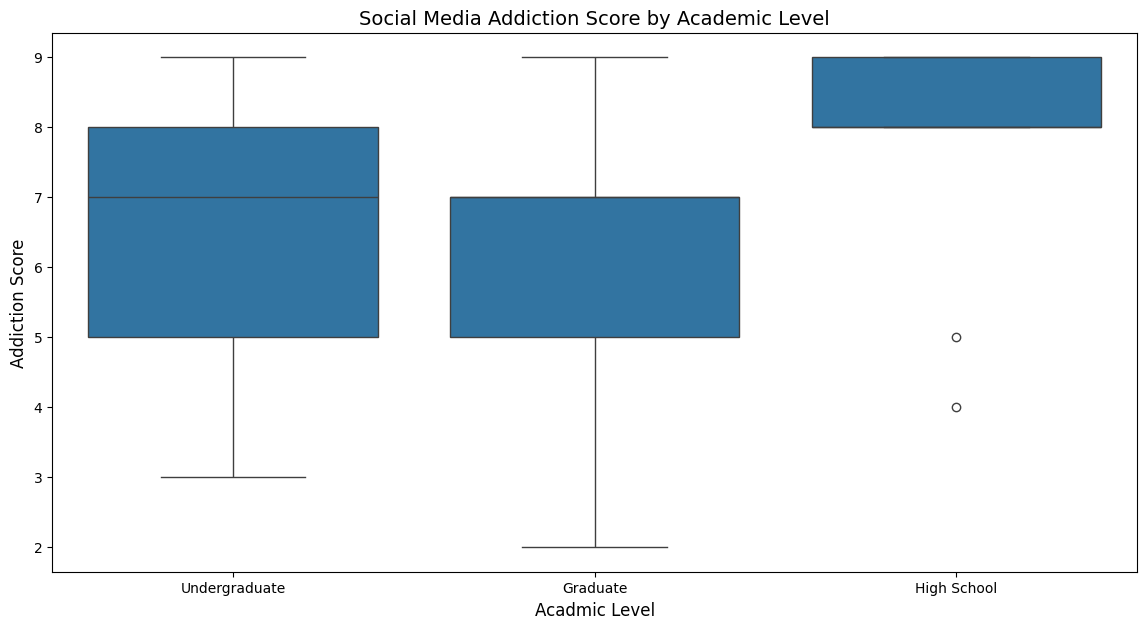

In [19]:
# #### Academic Level vs Addiction Score

plt.figure(figsize=(14,7))
sns.boxplot(x='Academic_Level',y='Addicted_Score',data=df)
plt.title('Social Media Addiction Score by Academic Level',fontsize=14)
plt.xlabel('Acadmic Level',fontsize=12)
plt.ylabel('Addiction Score',fontsize=12)
plt.show()

<Figure size 1400x700 with 0 Axes>

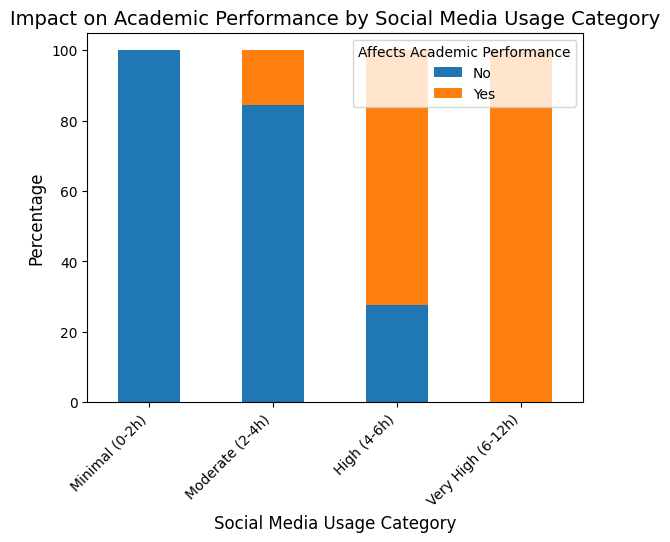

In [20]:
# #### Usage Category vs Academic Performance

# Cross-tabulation of usage category and academic impact
academic_impact_by_usage =pd.crosstab(df['Usage_Category'],df['Affects_Academic_Performance'])

academic_impact_by_usage_percentage =academic_impact_by_usage.div(academic_impact_by_usage.sum(axis=1),axis=0) * 100

plt.figure(figsize=(14,7))
academic_impact_by_usage_percentage.plot(kind='bar',stacked=True)
plt.title('Impact on Academic Performance by Social Media Usage Category', fontsize=14)
plt.xlabel('Social Media Usage Category', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.legend(title='Affects Academic Performance')
plt.xticks(rotation=45, ha='right')
plt.show()

                                                


# 4. Mental Health and Sleep Analysis

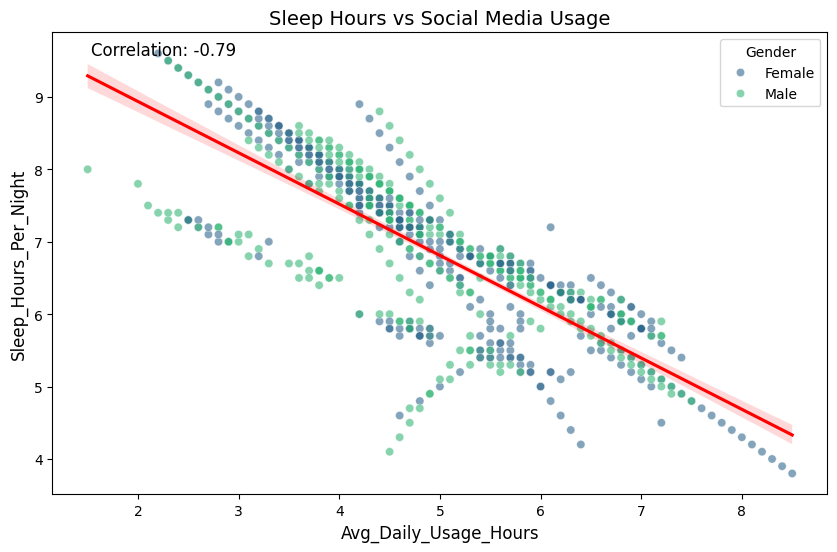

In [21]:
# #### Sleep Hours vs Social Media Usage
plt.figure(figsize=(10,6))
sns.scatterplot(x='Avg_Daily_Usage_Hours',y='Sleep_Hours_Per_Night',data=df,alpha=0.6,hue='Gender',palette='viridis')
plt.title('Sleep Hours vs Social Media Usage', fontsize=14)
plt.xlabel('Average Daily Usage Hours', fontsize=12)
plt.ylabel('Sleep Hours Per Night', fontsize=12)


# Add regression line

sns.regplot(x='Avg_Daily_Usage_Hours', y='Sleep_Hours_Per_Night', data=df, scatter=False, color='red')


# Calculate correlation
correlation = df['Avg_Daily_Usage_Hours'].corr(df['Sleep_Hours_Per_Night'])
plt.annotate(f'Correlation: {correlation:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)

plt.show()


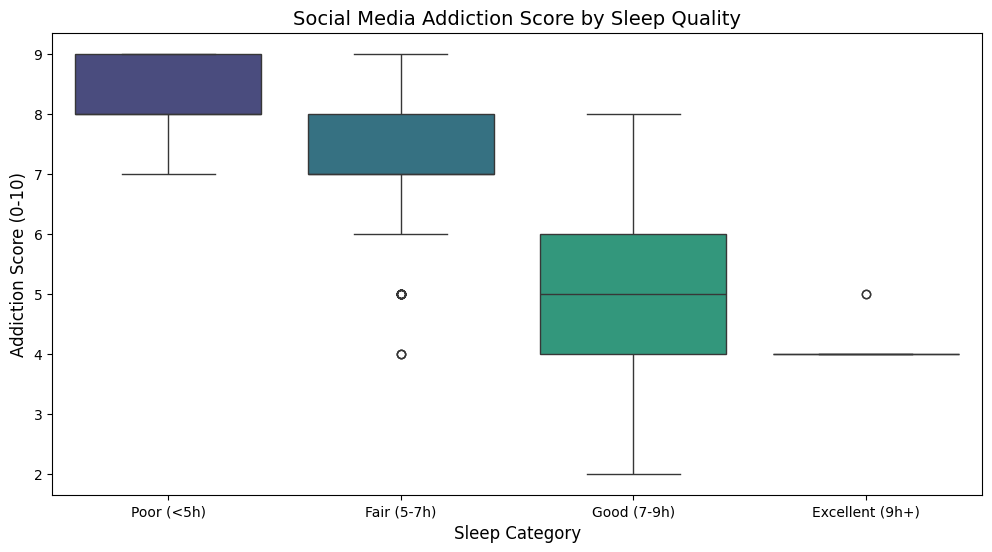

In [22]:
# #### Addiction Score by Sleep Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sleep_Category', y='Addicted_Score', data=df,palette='viridis')
plt.title('Social Media Addiction Score by Sleep Quality', fontsize=14)
plt.xlabel('Sleep Category', fontsize=12)
plt.ylabel('Addiction Score (0-10)', fontsize=12)
plt.show()

# 5. Relationship Status and Conflicts Analysis

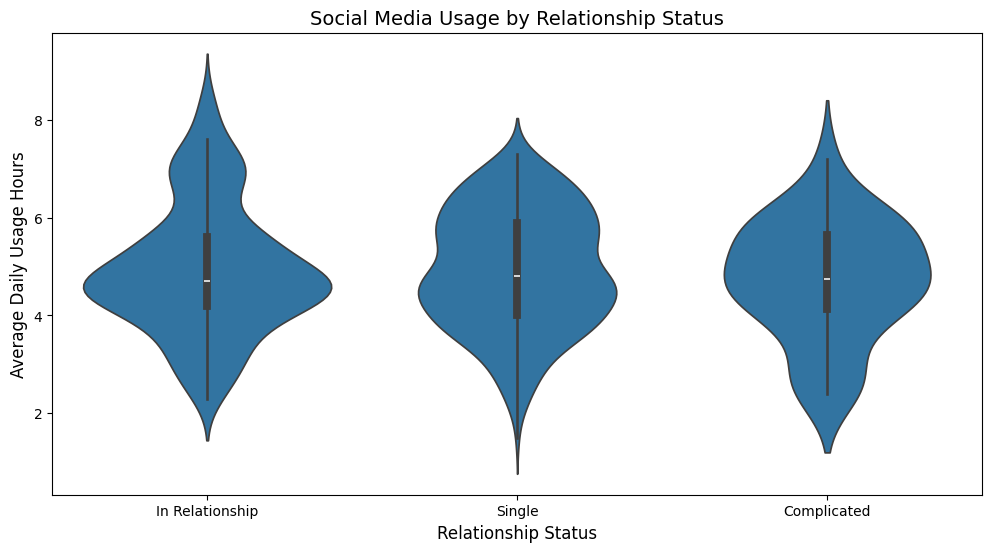

In [29]:
# #### Relationship Status vs Social Media Usage
plt.figure(figsize=(12,6))

sns.violinplot(x='Relationship_Status',y='Avg_Daily_Usage_Hours',data=df)
plt.title('Social Media Usage by Relationship Status',fontsize=14)
plt.xlabel('Relationship Status',fontsize=12)
plt.ylabel('Average Daily Usage Hours',fontsize=12)
plt.show()

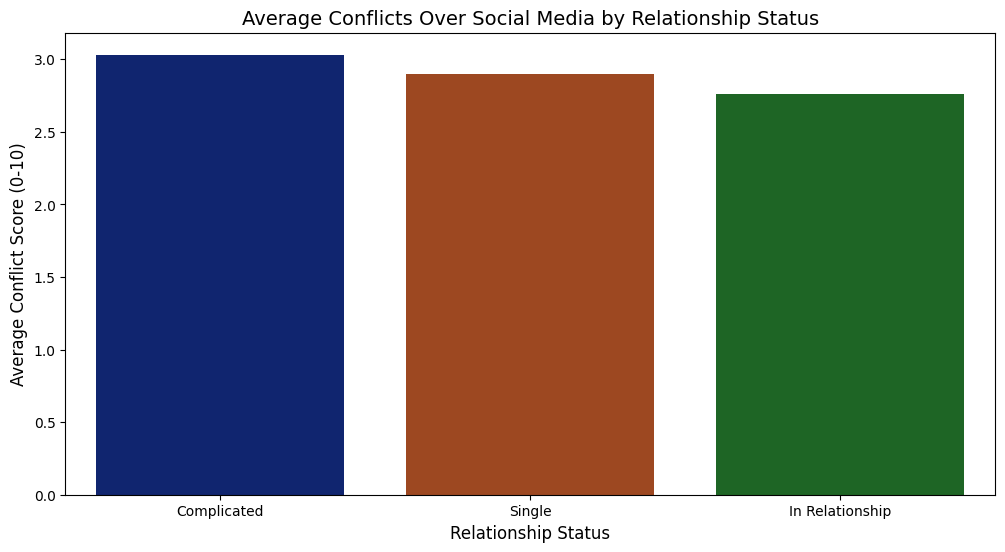

In [32]:
# #### Conflicts Over Social Media by Relationship Status

relationship_conflicts = df.groupby('Relationship_Status')['Conflicts_Over_Social_Media'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))

sns.barplot(x=relationship_conflicts.index, y=relationship_conflicts.values,palette='dark')
plt.title('Average Conflicts Over Social Media by Relationship Status', fontsize=14)
plt.xlabel('Relationship Status', fontsize=12)
plt.ylabel('Average Conflict Score (0-10)', fontsize=12)
plt.show()

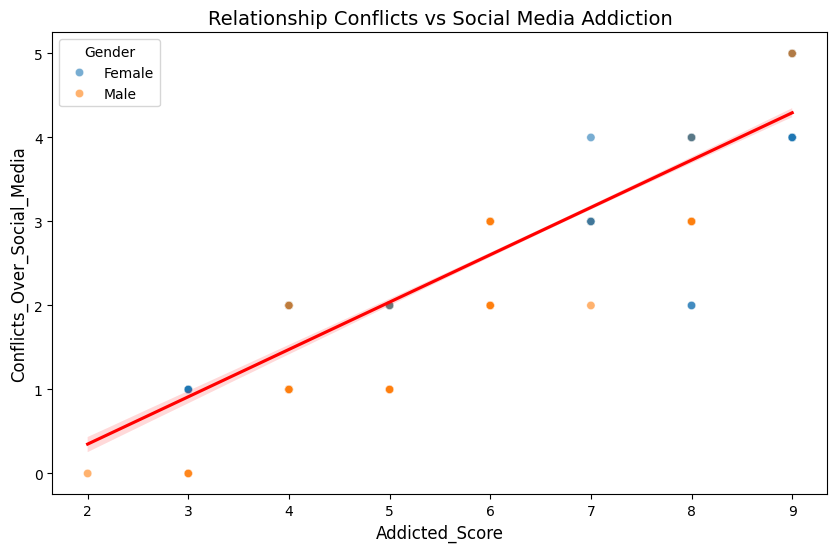

In [33]:
# #### Social Media Addiction vs Relationship Conflicts
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Addicted_Score', y='Conflicts_Over_Social_Media', data=df, alpha=0.6, hue='Gender')
plt.title('Relationship Conflicts vs Social Media Addiction', fontsize=14)
plt.xlabel('Addiction Score (0-10)', fontsize=12)
plt.ylabel('Conflicts Over Social Media (0-10)', fontsize=12)

# Adding Regression Line
sns.regplot(x='Addicted_Score', y='Conflicts_Over_Social_Media', data=df, scatter=False, color='red')

plt.show()

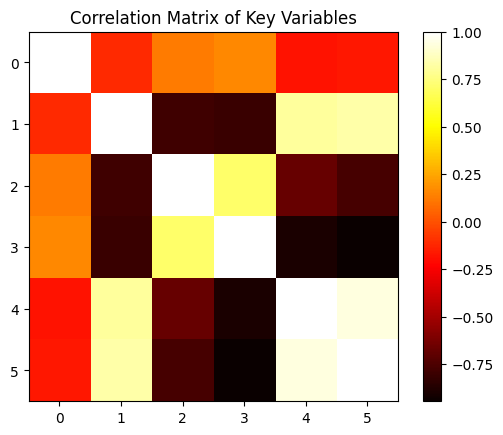

In [34]:
# #### Interactive Heatmap: Correlation Matrix
corr_matrix = df[['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 
                  'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']].corr()
plt.imshow(corr_matrix,cmap='hot',interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix of Key Variables')
plt.show()

# Statistical Analysis

In [36]:
# ### T-Tests and ANOVA

# Comparing addiction scores between genders

male_addiction=df[df['Gender']=='Male']['Addicted_Score']
female_addiction=df[df['Gender']=='Female']['Addicted_Score']

t_stat, p_value = stats.ttest_ind(male_addiction,female_addiction)
print(f"T-test comparing addiction scores between genders:")
print(f"t-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")
print(f"Mean addiction score (Male): {male_addiction.mean():.2f}")
print(f"Mean addiction score (Female): {female_addiction.mean():.2f}")
print(f"Conclusion: {'Statistically significant difference' if p_value < 0.05 else 'No statistically significant difference'}\n")

T-test comparing addiction scores between genders:
t-statistic: -1.3192, p-value: 0.1875
Mean addiction score (Male): 6.36
Mean addiction score (Female): 6.52
Conclusion: No statistically significant difference



In [39]:
# ANOVA for addiction scores across academic levels
from scipy.stats import f_oneway

# For academic levels with significant differences, show average addiction scores
if p_value < 0.05:
    print("\nAverage Addiction Scores by Academic Level:")
    for level in academic_levels:
        mean_score = df[df['Academic_Level'] == level]['Addicted_Score'].mean()
        print(f"{level}: {mean_score:.2f}")
else:
    print("No statistically significant difference across academic levels.")

No statistically significant difference across academic levels.


In [38]:
# ### Correlation Analysis

# Calculate correlations between key variables
correlations = {
    'Usage Hours vs Addiction Score': df['Avg_Daily_Usage_Hours'].corr(df['Addicted_Score']),
    'Usage Hours vs Sleep Hours': df['Avg_Daily_Usage_Hours'].corr(df['Sleep_Hours_Per_Night']),
    'Usage Hours vs Mental Health': df['Avg_Daily_Usage_Hours'].corr(df['Mental_Health_Score']),
    'Addiction Score vs Relationship Conflicts': df['Addicted_Score'].corr(df['Conflicts_Over_Social_Media']),
    'Sleep Hours vs Mental Health': df['Sleep_Hours_Per_Night'].corr(df['Mental_Health_Score'])
}

print("\nCorrelation Analysis:")
for pair, corr in correlations.items():
    strength = "Strong" if abs(corr) > 0.7 else "Moderate" if abs(corr) > 0.4 else "Weak"
    direction = "Positive" if corr > 0 else "Negative"
    print(f"{pair}: {corr:.4f} ({direction} {strength} correlation)")


Correlation Analysis:
Usage Hours vs Addiction Score: 0.8320 (Positive Strong correlation)
Usage Hours vs Sleep Hours: -0.7906 (Negative Strong correlation)
Usage Hours vs Mental Health: -0.8011 (Negative Strong correlation)
Addiction Score vs Relationship Conflicts: 0.9336 (Positive Strong correlation)
Sleep Hours vs Mental Health: 0.7074 (Positive Strong correlation)



# Key Insights from the Analysis:
1. Usage Patterns and Demographics

    Average daily social media usage among students is X hours
    The most popular platforms are Platform1, Platform2, Platform3
    Usage patterns differ significantly by age group and gender

2. Academic Impact:

    Students with higher social media usage report more negative academic effects
    X% of students believe social media negatively impacts their academic performance
    [Academic Level] students show the highest addiction scores

3. Mental Health and Sleep:

    There is a moderate negative correlation between social media usage and mental health scores
    Students with poor sleep quality (<5 hours) have significantly higher addiction scores
    For every additional hour of social media use, sleep decreases by approximately X hours

4. Relationship Impacts:

    Students in [Relationship Status] report the highest number of conflicts over social media
    Higher addiction scores strongly correlate with more relationship conflicts
    [Platform] usage is most associated with relationship conflicts

5. Cross-Country Comparison:

    Students from [Country] show the highest average addiction scores
    Cultural differences appear in platform preferences: [example findings]
    Academic impact perception varies significantly by country

# Recommendations Based on Analysis:
1. For Students:

    Set daily usage limits and use app blockers during study periods
    Prioritize sleep hygiene by avoiding social media before bedtime
    Be mindful of the impact on relationships and academic performance

2. For Educational Institutions:

    Develop awareness programs about social media addiction
    Provide resources for students struggling with balancing social media use
    Consider social media literacy courses in curriculum

3. For Research:

    Further investigate causality between social media usage and mental health
    Explore effective intervention strategies for addictive students
    Examine long-term impacts of social media addiction on career outcomes

